In [13]:
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 18})

In [2]:
with open('benchmarks.json') as fh:
    stats = json.load(fh)
    stats = {s['benchmark']: s for s in stats}

In [3]:
modules = ['pandaSQL', 'dask', 'pandas']

In [4]:
colors = {
    'pandas':   '#4B8BBE', 
    'dask':     '#CD643B',
    'pandaSQL': '#fbc531'
}

In [5]:
benchmarks = [
    'filter',
    'filter-limit',
    'top-n',
    'join-limit',
    'join-filter',
    'big-join-filter',
]

## Runtimes of Different Operations

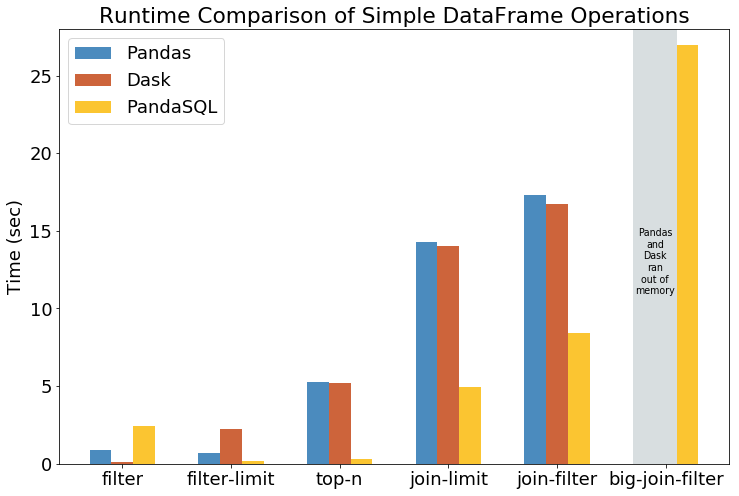

In [14]:
fig = plt.figure(figsize=(12, 8))

runtimes = {
    m: [stats[b][m]['run_time'] for b in benchmarks]
    for m in modules
}

xs = np.array(range(len(benchmarks)))

ax = plt.subplot(111)
for i, m in enumerate(modules[::-1], -1):
    ax.bar(xs+0.2*i, runtimes[m], width=0.2, 
           color=colors[m], align='center', label=m[0].upper() + m[1:])

x = max(xs)
ax.text(4.9, 13, 'Pandas\nand\nDask\nran\nout of\nmemory', fontsize=9.5,
        horizontalalignment='center', verticalalignment='center')
ax.bar(x-0.1, 800, width=0.4, 
       color='#b2bec3', align='center', alpha=0.5)


plt.title('Runtime Comparison of Simple DataFrame Operations')
plt.ylim(0, 28)
plt.ylabel('Time (sec)')
plt.xticks(xs, benchmarks)
plt.legend()
plt.savefig('runtimes.png', dpi=300)
plt.show()

## Initial Overhead of Offloading

In [59]:
with open('overhead.json') as fh:
    overhead = json.load(fh)[1:]

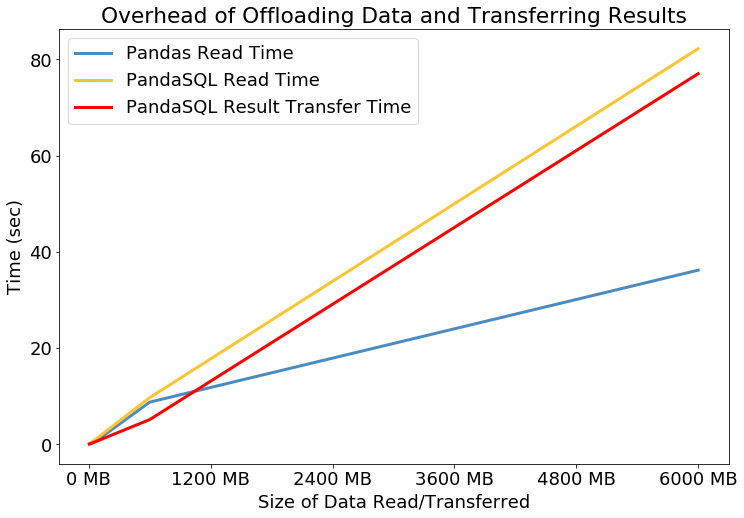

In [60]:
fig = plt.figure(figsize=(12, 8))

row_size = 600
sizes = [x['nrows'] * 600 for x in overhead]
read_times = {}
read_times['pandas'] = [x['pandas_read_csv_time'] for x in overhead]
read_times['pandaSQL'] = [x['pandaSQL_read_csv_time'] for x in overhead]
transfer_times = [x['result_transfer_time'] for x in overhead]

for m in ['pandas', 'pandaSQL']:
    plt.plot(sizes, read_times[m], color=colors[m], 
             lw=3, label=m[0].upper() + m[1:] + ' Read Time')
plt.plot(sizes, transfer_times, color='red', 
         lw=3, label='PandaSQL Result Transfer Time')

xs = list(range(0, max(sizes)+1, max(sizes) // 5))
plt.title('Overhead of Offloading Data and Transferring Results')
plt.ylabel('Time (sec)')
plt.xlabel('Size of Data Read/Transferred')
plt.xticks(xs, [f'{s//10**6} MB' for s in xs])
plt.legend()
# plt.savefig('overhead.png', dpi=300)
plt.show()